# Finding Heavy Traffic Indicators on I-94

We're going to analyze a dataset about the westbound traffic on the I-94 Interstate highway. John Hogue made the dataset available, and you can download it from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. For instance, we may find out that the traffic is usually heavier in the summer or when it snows.

## 1.  The I-94 Traffic Dataset

In [99]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
# load  I-94 Traffic Dataset
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head(10)

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
5,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181
6,None,293.17,0.0,0.0,1,Clear,sky is clear,2012-10-02 15:00:00,5584
7,None,293.86,0.0,0.0,1,Clear,sky is clear,2012-10-02 16:00:00,6015
8,None,294.14,0.0,0.0,20,Clouds,few clouds,2012-10-02 17:00:00,5791
9,None,293.10,0.0,0.0,20,Clouds,few clouds,2012-10-02 18:00:00,4770


In [101]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The daaset has 48204 rows and 9 columns. There is no null value.

The station located approximately midway between Minneapolis and Saint Paul recorded the traffic data. Also, the station only records westbound traffic. This means that the results of our analysis will be about the westbound traffic in the proximity of that station. In other words, we should avoid generalizing our results for the entire I-94 highway.


## 2. Analyzing Traffic Volume

We're going to plot a histogram to visualize the distribution of the traffic_volume column.

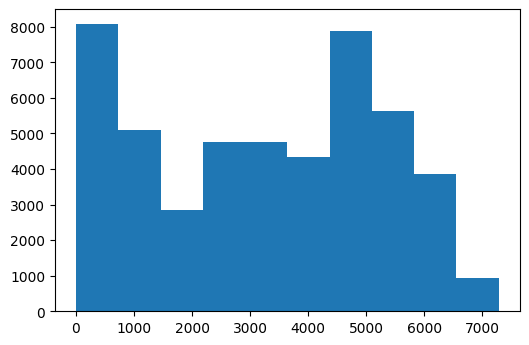

In [102]:
plt.hist(i_94['traffic_volume'])
plt.plot()
plt.show()

In [103]:
i_94['traffic_volume'] .describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

We analyzed the distribution of traffic_volume and found the following:

* About 25% of the time, there were 1,193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* About 25% of the time, the traffic volume was four times as much (4,933 cars or more).

The possibility that nighttime and daytime might influence traffic volume gives our analysis an interesting direction: comparing daytime with nighttime data. 

## 3. Traffic Volume: Day vs. Night

We'll transform the date_time column to datetime  and divide the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [104]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])
i_94['hour'] =i_94['date_time'].dt.hour

day = i_94.copy()[i_94['hour'].between(7,18)]
night = i_94.copy().drop(day.index)

print(day.shape)
print(night.shape)

(23877, 10)
(24327, 10)


## 4. Traffic Volume: Day vs. Night (II)

We have divided the dataset into two parts for day time and night time.

To compare the traffic volume at night and during day, we're going to plot the histograms of traffic_volume for both day and night, and look up a few statistics for traffic_volume for both day and night. 

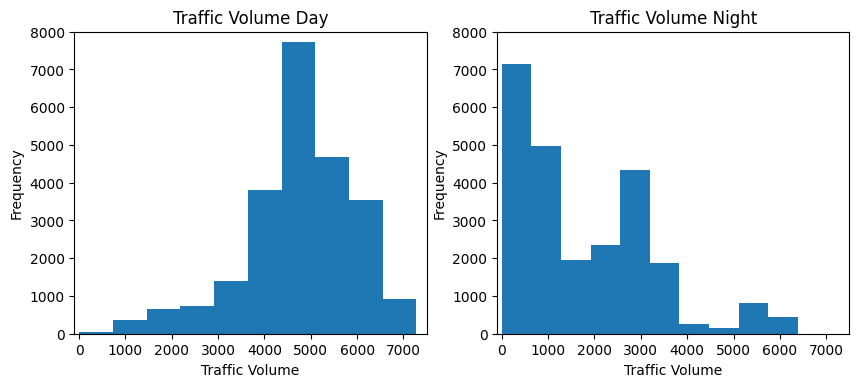

In [105]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Traffic Volume Day')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([-100,7500])
plt.ylim([0,8000])

plt.subplot(1, 2,2)
plt.hist(night['traffic_volume'])
plt.title('Traffic Volume Night')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([-100,7500])
plt.ylim([0,8000])

plt.plot()
plt.show()

In [106]:
day['traffic_volume'] .describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [107]:
night['traffic_volume'] .describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The histogram that shows traffic volume of the day is right skewed, which means most traffic volume are hight.  There are 4,252 or more cars passing the station each hour 75% of the time.

On the contrary, The histogram that shows traffic volume of the night is left skewed, meaning most traffic volume are low. There are less than 2819 cars passing the station each hour 75% of the time.

We concluded that the traffic at night is generally light. Our goal is to find indicators of heavy traffic, so we decided to only focus on the daytime data moving forward.

## 5. Time Indicators (I) - month

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day. 

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

* Month
* Day of the week
* Time of day

Let's start with generating the plot for the first time unit : the month.

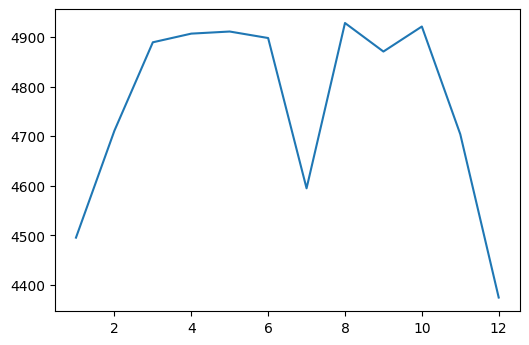

In [108]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']
plt.plot(by_month['traffic_volume'])
plt.show()

Traffic is heavy from March to October, with exception of the July. Lest visualize July traffic volume of each year.

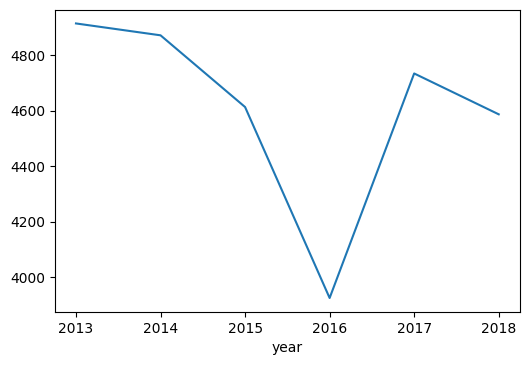

In [109]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Traffice of July 2016 is about 20% lower than peak year. 

Below, we remove 2016 data, and re-generate the plot for traffice volume by month:

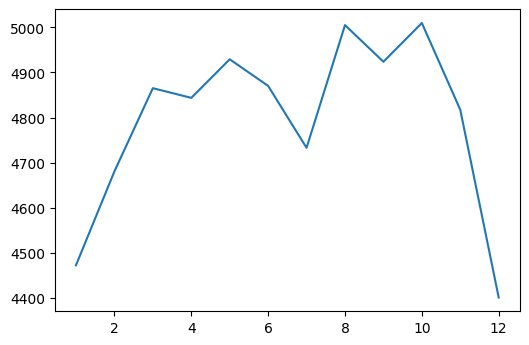

In [110]:
day_no_2016 = day[day['year']!=2016].copy()
day_no_2016['month'] = day_no_2016['date_time'].dt.month
by_month_no_2016 = day_no_2016.groupby('month').mean()
by_month_no_2016['traffic_volume']
plt.plot(by_month_no_2016['traffic_volume'])
plt.show()

After excluding 2016 data, we got similar result. Traffic is heavy from March to October, with exception of the July. It seems that people drive less during summer vacation.


## 6. Time Indicators (II) - Day Of Week

We'll now continue with building line plots for another time unit: day of the week.

First we'll get the traffic volume averages for each day of the week,

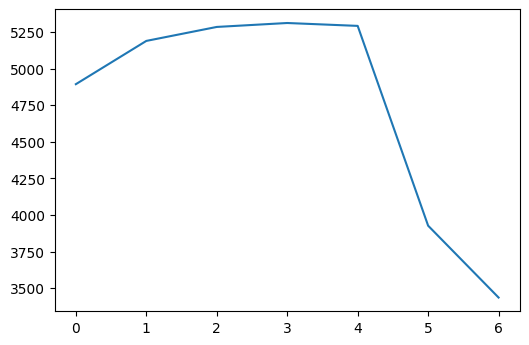

In [111]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']
plt.plot(by_dayofweek['traffic_volume'])
plt.show()

We can see that the traffic volume is significantly heavier on business days compared to the weekends.

## 7. Time Indicators (III) - Hour

We're going to look at the weekday and weekend hourly averages separately. To do that, we'll start by splitting the data based on the day type: business day or weekend.

In [112]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday

by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


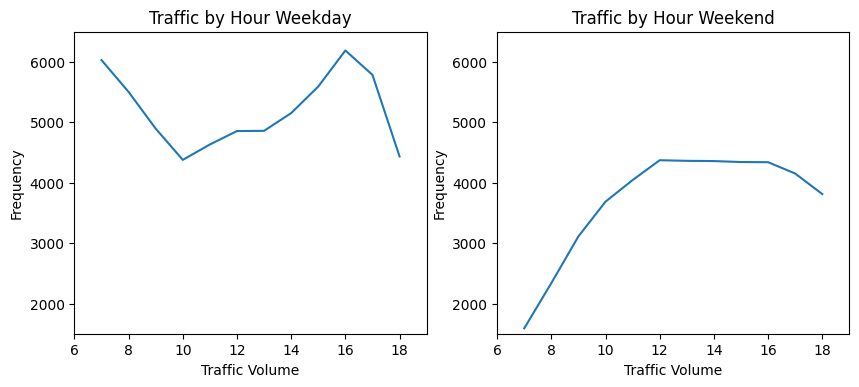

In [113]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic by Hour Weekday')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([6,19])
plt.ylim([1500,6500])

plt.subplot(1, 2,2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic by Hour Weekend')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.xlim([6,19])
plt.ylim([1500,6500])

plt.plot()
plt.show()

So far, we've focused on finding time indicators for heavy traffic, and we reached the following conclusions:

* The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

## 8. Weather Indicators (Numeric)

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: temp, rain_1h, snow_1h, clouds_all, weather_main, weather_description.

A few of these columns are numerical, so let's start by looking up their correlation values with traffic_volume.

In [114]:
day.corr() ['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
hour              0.172704
month            -0.022337
year             -0.003557
dayofweek        -0.416453
Name: traffic_volume, dtype: float64

Temperature has the stongest correlation with traffic,but only about 13%. Let's visualize the correlation using scatter plot

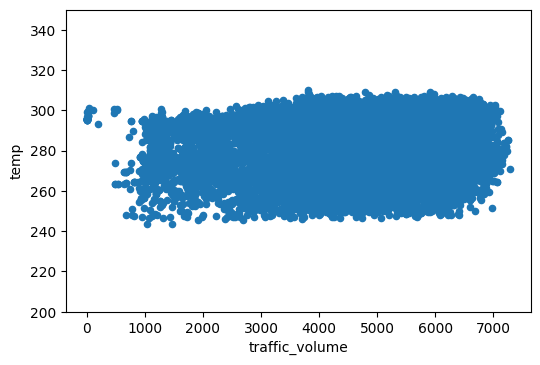

In [115]:
day.plot.scatter('traffic_volume','temp')
plt.ylim([200,350])
plt.show()

We determined that temperature is not a reliable indicators for heavy traffic.

Since we didn't find any reliable numerical indicator of heavy traffic,  we'll look next at the categorical weather-related columns: weather_main and weather_description.


## 9. Weather Types (Category)

we're going to group the data by weather_main and weather_description while using the mean as an aggregate function.

Then plot horizontal bar plots for the traffic_volume column of by_weather_main

In [116]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

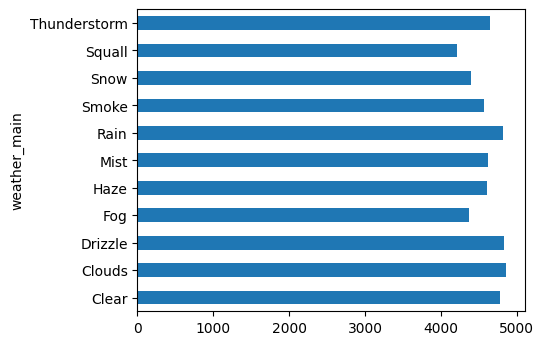

In [117]:
plt.figure(figsize=(5,4)) 
by_weather_main['traffic_volume'].plot.barh()
plt.show()

There is no weather main type where traffic volume exceeding 5,000 cars.

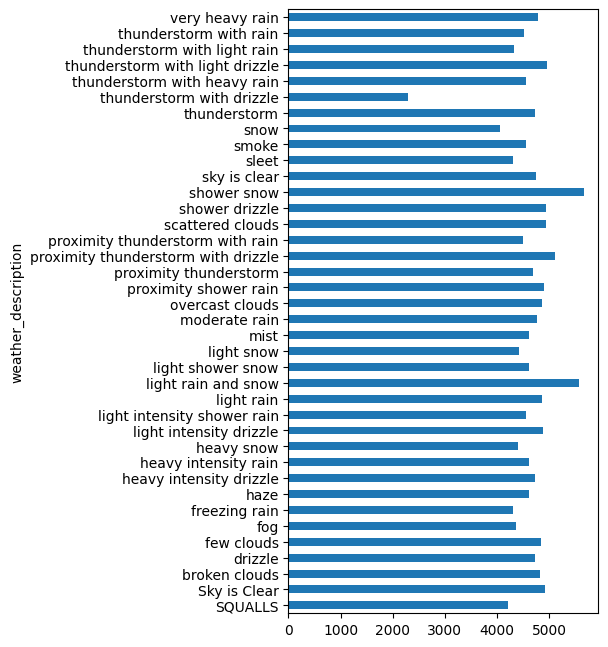

In [118]:
plt.figure(figsize=(4,8))
by_weather_description['traffic_volume'].plot.barh()
plt.show()

There are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle

It seems that people drive more when the weather is slightly bad.

## 10. Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:

* Time indicators

   * The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
   * The traffic is usually heavier on business days compared to the weekends.
   * On business days, the rush hours are around 7 and 16.
   
* Weather indicators
   * Shower snow
   * Light rain and snow
   * Proximity thunderstorm with drizzle